# Iris Data Classification 🌸🌼🪻

---


> A popular classification dataset for machine learning, consisting of three classes, each with 50 cases.


> The goal is to classify the iris flowers to one of three species (Setosa, Versicolor, Virginica)


> In this project, we employ a deep learning models to classify the dataset and analyze the performance of each one.




---



# Importing libraries 📚

> Using necessary libraries for numerical computations, data manipulation, visualization ... etc

---



In [ ]:
!pip install pandas numpy scikit-learn tensorflow matplotlib seaborn

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.preprocessing import StandardScaler , RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator
from pandas.plotting import parallel_coordinates
from scipy.interpolate import griddata

# Load The Data 📂

---



In [3]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


*The data is made up of 4 columns (sepal length, sepal width, petal length and petal width and the species) the goal is to find the relationship between them to predict the species*


---



# Exploratory Data Analysis 🔎

---







**Analyzing Data 📊**



> That include checking for null values, column types, distribution ..etc

---
- The first thing i did was check for null values.


In [4]:
df.isnull().sum()

,0
sepal_l,0
sepal_w,0
petal_l,0
petal_w,0
species,0


*Since there are no null values there is no need to handle it by filling the missing values with mean or median or any other other method*

---

- Next I will check the shape to see the number of rows and columns.

In [5]:
df.shape

(150, 5)

---

- Insight to the data types is needed to see if any feature need encoding.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sepal_l  150 non-null    float64
 1   sepal_w  150 non-null    float64
 2   petal_l  150 non-null    float64
 3   petal_w  150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


*The output shows that species is an object type or a string, so we need to change it to numeric values using encoding.*

---
using info helps us to understand the data type and information about data.



In [7]:
df.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


*describe is a static summary to help us identify any outliers.*


---

- Plotting the data to see if it's balanced or not.

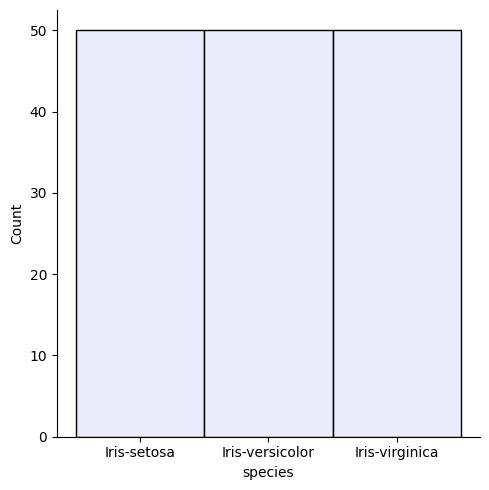

In [8]:
sns.displot(df, x="species", color="lavender", alpha=0.8, edgecolor="black")
plt.show()

*The prior code tells us that there are no null values, and four of the columns are float with the exception of the target, as well as the statistics of the data (based on table we have a symmetric distribution, and wide range of flower sizes), etc. The plot and table ensure us that it's a balance dataset.*


---



**Encoding 🔒**



> Encoding the target variable "species" from categorical to numerical.

---
- Using `LabelEncoder` to convert species to non-numeric.


In [9]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [10]:
df['species'].unique()

array([0, 1, 2])

In [11]:
df.info()
print("------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sepal_l  150 non-null    float64
 1   sepal_w  150 non-null    float64
 2   petal_l  150 non-null    float64
 3   petal_w  150 non-null    float64
 4   species  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
------------------------------



*Now we have all numeric data.*


*   Class 0 = Setosa
*   Class 1 = Versicolor
* Class 2 = Virginica




---



**Plotting the data 📊**

---
- First plot I will do is a bar plot, to see the distibution of the data.


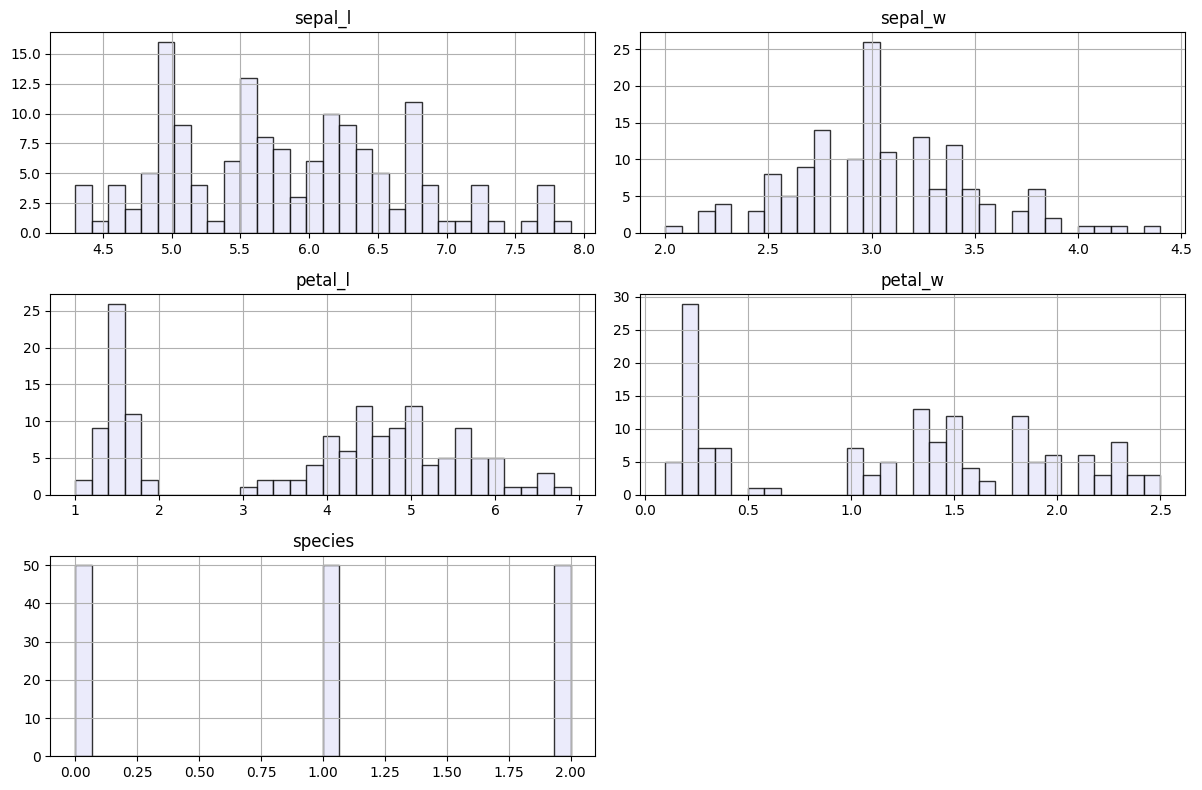

In [12]:
df.hist(figsize=(12, 8) ,color='lavender', alpha=0.8 , edgecolor='black', bins=30)
plt.tight_layout()
plt.show()

* **sepal_l** has roughly normal distribution with a peak value at 5

* **sepal_w** normal distribution with a peak value at 3

* **petal_l** Bimodal distribution (2 distant groups)

* **petal_w** Bimodal distribution


*We can see that petal_l and petal_w are great features for class separation.*

---


**correlations 📐**

- Observing the correlations to understand the relationship between the features.

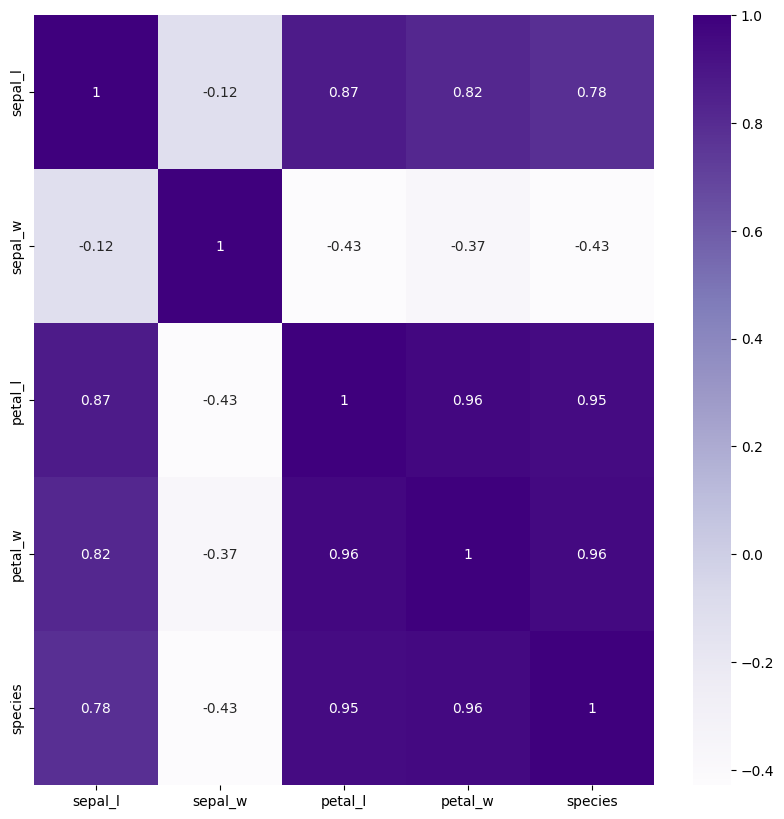

In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="Purples")
plt.show()

**Strong correlations**

* sepal_l petal_l , petal_w and species with eachother.

* All ranging from 0.78 to 0.96

* The strongest correlations is between petal_l and petal_w

* Since petal_l and petal_w have a strong correlations with species, this suggest it's a strong factor to classify flower species.

**Weak Correlations**

* sepal_w has no strong correlations with any feature.
* Negtive correlations with the other features


---

**Pair Plot 📊**

- Using pairplot to see class separation and overlaping.



/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

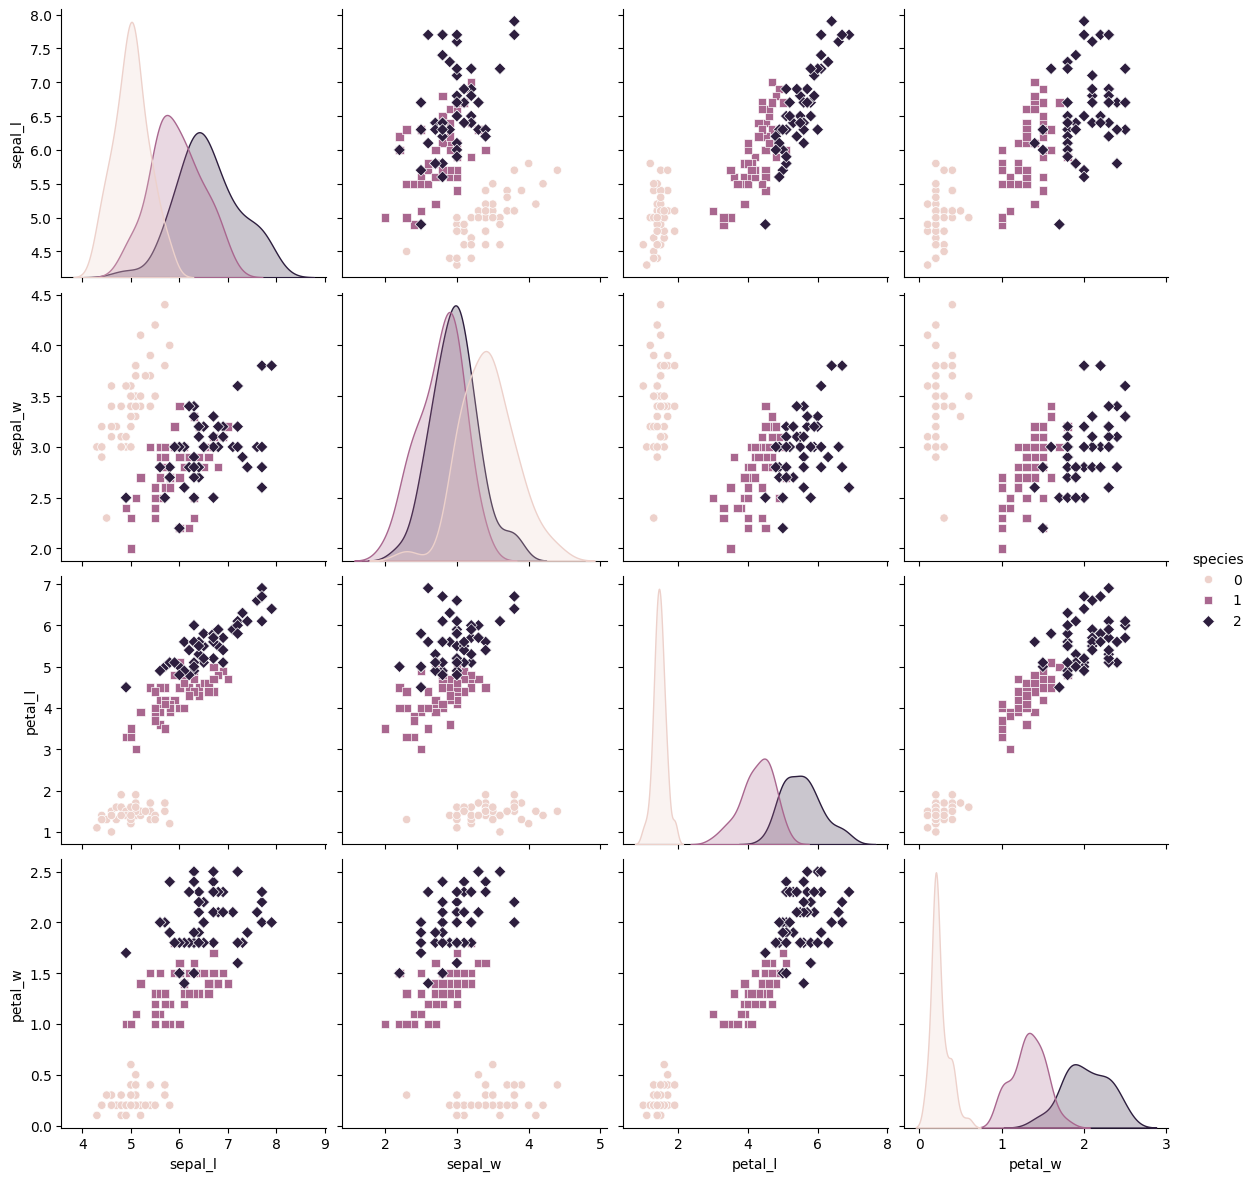

In [14]:
plt.figure()
sns.pairplot(df, hue="species", size = 3, markers=["o", "s", "D"])
plt.show()

*The overall plot show an overlap between Versicolor and Virginic, which indicates they may be harder to distinguish in the model. Also, the scatter plots shows how petal_l and petal_w have a clear seperation between classes.*

---



**Parallel Coordinates Plot**

- Using parallel coordinates helps compare the features, class separation and outliers as well.

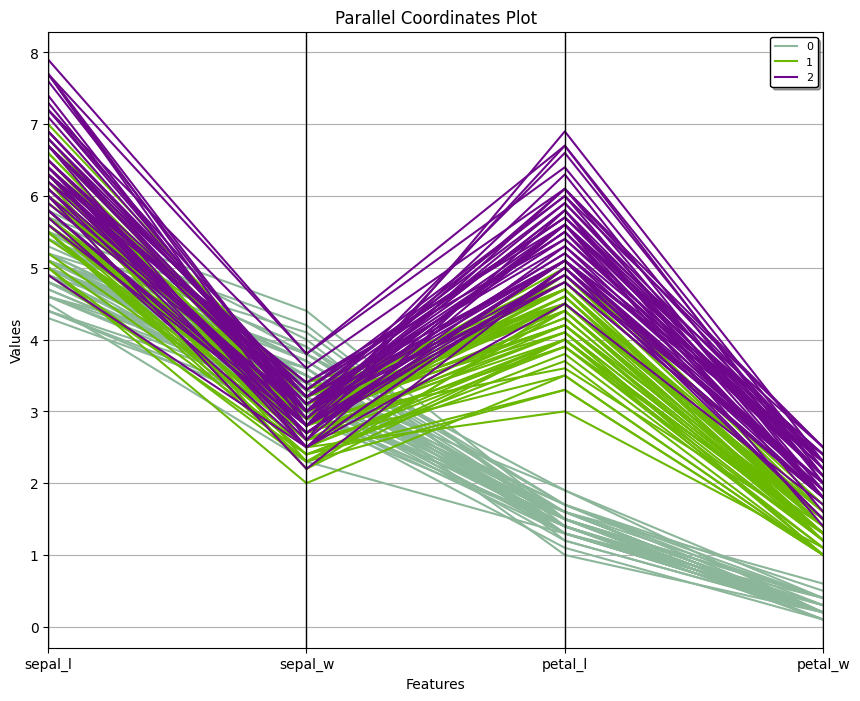

In [15]:
plt.figure(figsize=(10,8))
parallel_coordinates(df, "species")
plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend(loc=1, prop={'size': 8},  shadow=True, facecolor="white", edgecolor="black")
plt.show()

*The plot shows that petal length and width are important for separating the Setosa with the other 2 species. The speal length and width have more overlap, whish suggest that they are not relable for the model. However, outliers are not visable in the plot so using box plot would be more helpful.*

---



**Hex Plot 🐝**

- Using hex plot help us see the density of the data without overlapping. However, it's mostly used for larger dataset.

<Figure size 800x600 with 0 Axes>

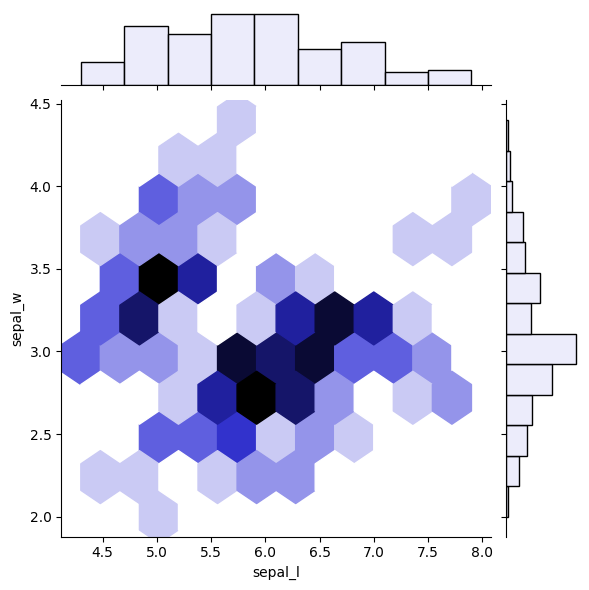

In [16]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='sepal_l', y='sepal_w', data=df, kind='hex', color="lavender")
plt.show()

<Figure size 800x600 with 0 Axes>

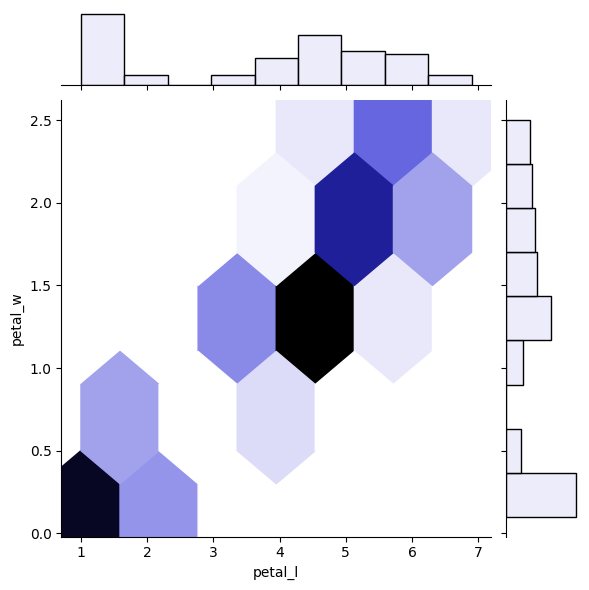

In [17]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='petal_l', y='petal_w', data=df, kind='hex', color="lavender")
plt.show()





---

**First plot**

- Indicates a group of flowers with similar lengths and widths.

**Second Plot**

- The relationship is more noticable, therefor petal features are more effective than sepal features.



---




**Finding Outlies 📍**

- Using box plot to help identify outliers

In [18]:
purple_palette = ['#6a0dad', '#8a2be2', '#9b30ff']

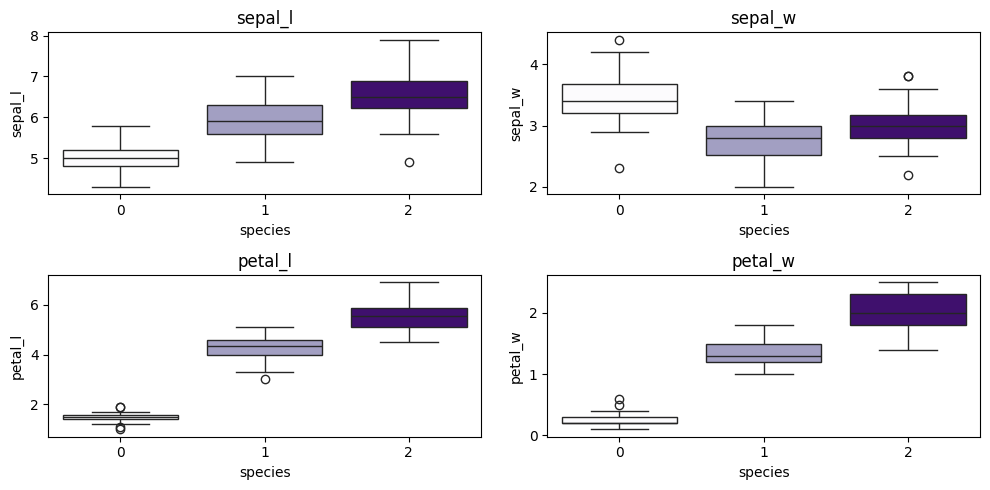

In [19]:
plt.figure(figsize=(10,5))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.boxplot(x='species', y= feature, data=df, palette="Purples",  hue='species', legend=False)
    plt.title(f'{feature}')
plt.tight_layout()
plt.show()



> Sepal_l : In species 0 has the shortest sepal, species 1 has medium, and species 2 has the largest as well as 1 outlier. There is minimum overlap and clear separation.



> Sepal_w : Species 0 has the widest width with 2 outliers, species 1 is the narrowest, and species 2 less wider than o with 2 outlier. An overlap between them is noticable so using this feature alone wouldn't be great for classification.



> Petal_l : Species 0 has the shortest petal with 2 outliers, species 1 medium petal with 1 outlier, and species 2 has the largest petal with no outliers. An overlap between species 1 and 2.



> Petal_w : Species 0 is the narrowest with 2 outliers, species 1 has a medium width with no outliers and species 2 is the widest with no outliers. An overlap between species 1 and 2, as well as a clear seperation species 0 with species 1 and 2.  



---
**Every plot has proven that petal features (petal_w and petal_l) are more suitable for classification than sepal.**

Finally I wanted to do a 3d plot cause why not ?

---

**3D  Scatter Plot**

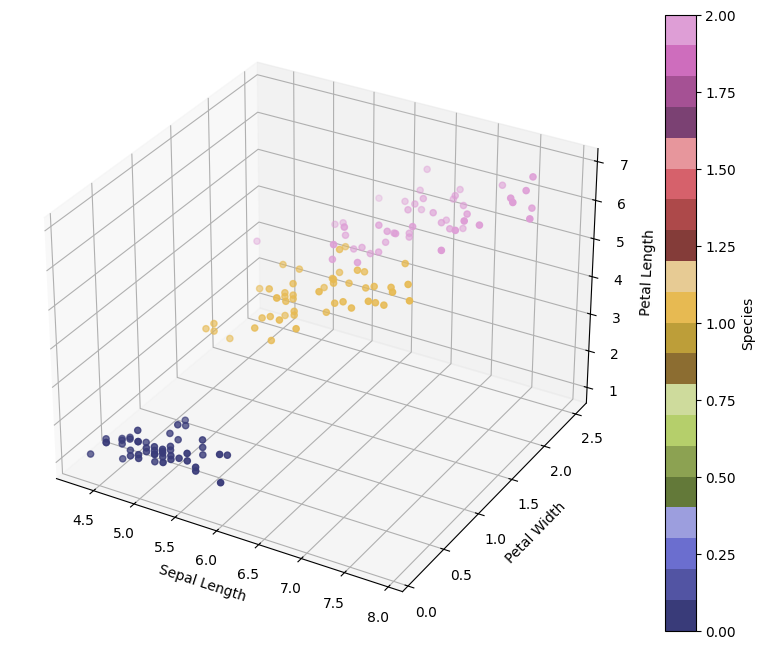

In [20]:
fig_3d = plt.figure(figsize=(10,8))
ax = fig_3d.add_subplot(111, projection='3d')
scatter = ax.scatter(df['sepal_l'], df['petal_w'], df['petal_l'], c=df['species'], cmap='tab20b')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Petal Length')


plt.colorbar(scatter, label='Species')

plt.show()

The 3d plot also shows the overlap between Versicolor and Virginic, and a clear spearation of Setosa. The petal length is shown to be the most important feature, the sepeation of the 3 features is clear with petal length.

---



**Normalize 🔍**

- Since there is outliers, normlizing the data using scaling methods can help. I perfer using scaling method such as standard or robust to reduce their effect instead of removing them.

In [21]:
X = df.drop('species', axis=1)
Y = df['species']

In [22]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# **Contour Plot ✏️**

In [53]:
sepal_length = df['sepal_l']
sepal_width = df['sepal_w']
petal_length = df['petal_l']
petal_width = df['petal_w']

In [54]:
x = np.linspace(sepal_length.min(), sepal_length.max(), 50)
y = np.linspace(sepal_width.min(), sepal_width.max(), 50)
X, Y = np.meshgrid(x, y)

In [55]:
Z_petal_length = griddata((sepal_length, sepal_width), petal_length, (X, Y), method='linear')
Z_petal_width = griddata((sepal_length, sepal_width), petal_width, (X, Y), method='linear')

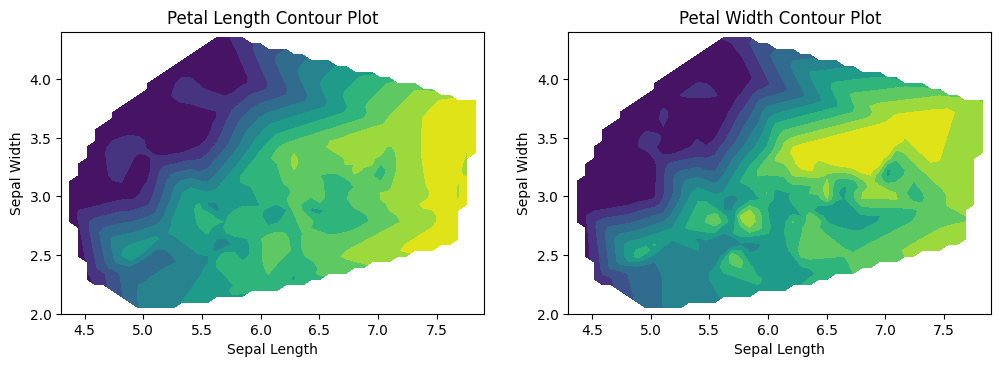

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.contourf(X, Y, Z_petal_length, levels=np.linspace(petal_length.min(), petal_length.max(), 11), cmap='viridis')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')
ax1.set_title('Petal Length Contour Plot')
ax1.set_aspect('equal')

ax2.contourf(X, Y, Z_petal_width, levels=np.linspace(petal_width.min(), petal_width.max(), 11), cmap='viridis')
ax2.set_xlabel('Sepal Length')
ax2.set_ylabel('Sepal Width')
ax2.set_title('Petal Width Contour Plot')
ax2.set_aspect('equal')

plt.show()

The petal length plot showed a clear separation of features, as did the petal width plot.Overall, this figure demonstrated the importance of petal measurement, unlike sepal measurement. I tried to do this plot after my failed attempt with the 3d surface plot, I thought this plot better in understanding it and visualizing it.

---



# Building a Neural Network 🧠




> Spliting the data into train and test.



> Define the architecture.


> Train the model.


> Evaluate and test.



> Plot the training process.




---

**Architecture 👩‍💻**


I got an idea to create a neural network when researching how to do it by watching YouTube videos and other people's work. I decided to work with tensorflow because i'm more fimilar with it, I used it with previous projects such as image preprocessing.




---

- **First model**: I will employ two parameters (petal width and length) based on the analysis; there should be a clear separation and strong relationship between species 0 and (1,2).

1. Using `Sequential()`: Because the dataset it simple, there is no need to use complex architecture. Also, the dataset is small only having total of 150 data. Not to mention is very easy to implement, which saves me valuable time.

2. Using `Relu` activation function: Based on my research I found most people use `Relu`, because it's fast and effective. However, using other activation functions such as `ELU` since it's solve the limitation of `Relu` by allowing negtiave values but for this assignment, I decided that simplicity is preferable; I don't want to overcomplicate things.

3. Using `Softmax`: Since it's a multiclass classification problem.
---




# **First Model 🔨**

---
First I will select the wanted features, and split them into train and test.

In [ ]:
X_petal = df[['petal_l', 'petal_w']]
y = df['species']

In [ ]:
X_train_petal, X_test_petal, y_train, y_test = train_test_split(
    X_petal, y, test_size=0.2, random_state=42
)

In [ ]:
X_train_petal.shape, X_test_petal.shape, y_train.shape, y_test.shape

((120, 2), (30, 2), (120,), (30,))

---
Now building the neural netwoek, the architecture is simple and clear only having 3 layers including the input and output layers.

In [ ]:
model1 = Sequential()
model1.add(Dense(16, activation='relu', input_shape=(2,)))
model1.add(Dense(8, activation= 'relu'))
model1.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---

Using adam compiler with 0,01 learning rate seemed good for a starting point but the model performed well so, I didn't change it.

In [ ]:
model1.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Epoch Analysis 👩‍💻**

- Initially trained the model for 30 epochs, giving decent accuracy
- Retrained for another 30 epochs and saw a performance improvement.
- Finally, decided to train with 50 epoch, which resulated in an improved accuracy.

*After trail and errors with the number of neurons, I found that 16 for first layer, 8 for the second gave me better result. Also I changed the batch size from 32 to 8, since the dataset is small I though that a smaller batch size would be appropite*

In [ ]:
hist1 = model1.fit(X_train_petal, y_train, epochs = 50 , batch_size = 8 , validation_data=(X_test_petal, y_test) )

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.2502 - loss: 1.0172 - val_accuracy: 0.5667 - val_loss: 0.9270
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5161 - loss: 0.9279 - val_accuracy: 0.7333 - val_loss: 0.8225
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7240 - loss: 0.8077 - val_accuracy: 0.7667 - val_loss: 0.7324
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6580 - loss: 0.7610 - val_accuracy: 0.7333 - val_loss: 0.6637
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8459 - loss: 0.6805 - val_accuracy: 0.9667 - val_loss: 0.6263
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8631 - loss: 0.6241 - val_accuracy: 0.9000 - val_loss: 0.5571
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8980 - loss: 0.5624 - val_accuracy: 0.8000 - val_loss: 0.5058
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7674 - loss: 0.5340 - val_accuracy: 1.0000 - va

In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 635 (2.48 KB)

 Trainable params: 211 (844.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 424 (1.66 KB)

In [ ]:
loss, accuracy = model1.evaluate(X_test_petal, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.03398627042770386
Test Accuracy: 1.0


The accuracy looks good, at first I thought that the model is overfitting beacuse the test accuracy is 100%, but both val_accuracy and accuracy are high and similar, indicating a good generalization, and val_loss has not increases.

---
Next, I will predict using test model, see the predicted class, the precentage and the actual class. Also, I will plot a confusion matrix so it will be easy to visulaize.

---

In [ ]:
pred_1 = model1.predict(X_test_petal)
pred_1_class = np.argmax(pred_1, axis=1)

for i in range(len(X_test_petal)):
  print(f"Prediction for sample {i+1}")
  print(f"Predicted Class: {pred_1_class[i]}")
  print(f"Percentage: {pred_1[i][pred_1_class[i]]:.1%}")
  print(f"The Actual Value: {y_test.iloc[i]} ")
  print("----------------------------------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction for sample 1
Predicted Class: 1
Percentage: 98.8%
The Actual Value: 1 
----------------------------------------
Prediction for sample 2
Predicted Class: 0
Percentage: 100.0%
The Actual Value: 0 
----------------------------------------
Prediction for sample 3
Predicted Class: 2
Percentage: 100.0%
The Actual Value: 2 
----------------------------------------
Prediction for sample 4
Predicted Class: 1
Percentage: 91.7%
The Actual Value: 1 
----------------------------------------
Prediction for sample 5
Predicted Class: 1
Percentage: 93.2%
The Actual Value: 1 
----------------------------------------
Prediction for sample 6
Predicted Class: 0
Percentage: 100.0%
The Actual Value: 0 
----------------------------------------
Prediction for sample 7
Predicted Class: 1
Percentage: 99.0%
The Actual Value: 1 
----------------------------------------
Prediction for sample 8
Predicted Class: 2
Percentage: 99.6%
The Actual Value: 2 
----------------

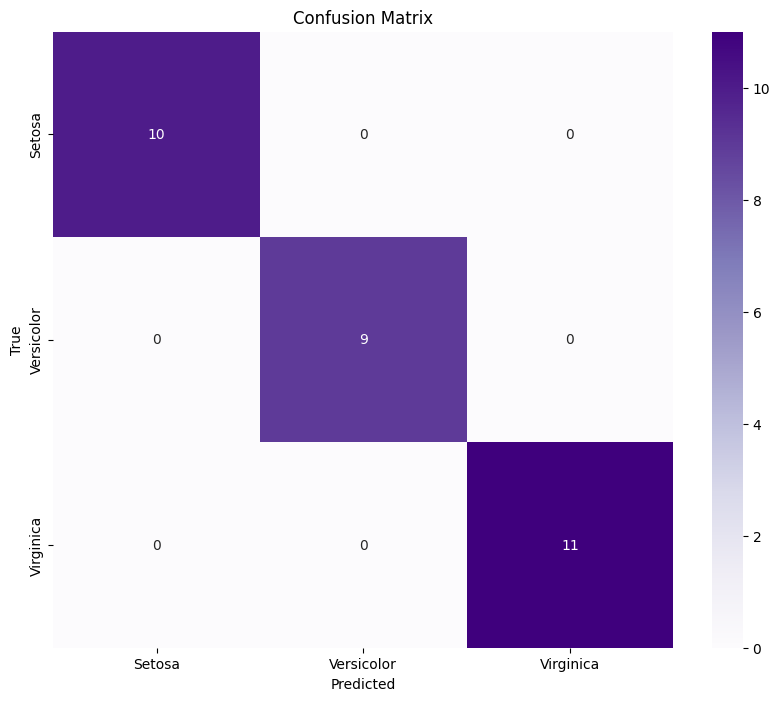

In [ ]:
ConfusionMatrix = confusion_matrix(y_test, pred_1_class)
plt.figure(figsize=(10,8))
sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='Purples', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The test sample and confusion matrix show that everything was correct. This indicates that a basic architecture is preferable for the dataset, with an appropriate training time and number of neurons.

---

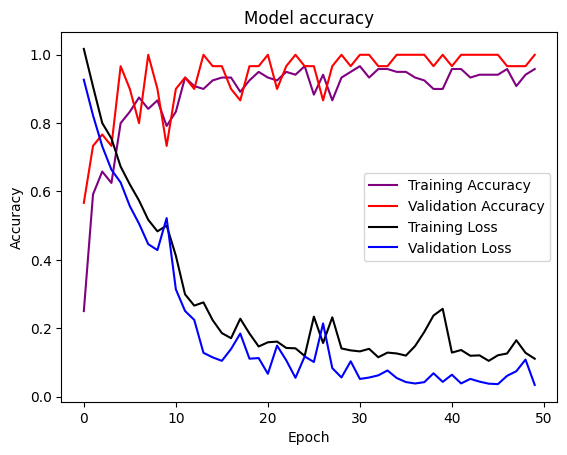

In [ ]:
plt.plot(hist1.history['accuracy'], color='purple', label="Training Accuracy")
plt.plot(hist1.history['val_accuracy'], color ='Red', label = 'Validation Accuracy')
plt.plot(hist1.history['loss'], color = 'black', label = 'Training Loss')
plt.plot(hist1.history['val_loss'], color = 'blue', label = 'Validation Loss')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

It is evident from the plot that as accuracy increases, loss decreases for both training and validation, so the model is not overfitting. This indicates using two features was an effective choice to develop a well balance model that is able to generalize new data.

*I also wanted to try a more complex model for the dataset to compare performaces.*



---



# **Second Model 🔨**

The second model I wanted to change the hidden layers to experiment diffrenent activation function such as `leak ReLu` or `ELU`. I will use 3 parameters (Petal length and width, and sepal length) These 3 features had high corrleation between them. I will also make the model more complex to use diffrenet methods.


1. Using `Sequential()`: Same as my reasoning for the first model.

2. Using `LeakyReLU` activation function: I wanted to see the diffrenece between `ReLu` and `LeakyReLU` and if it will solve the overlap between Virginica and Versicolor.

3. Using `ELU` activation function: Researching I found that `ELU` is a string alternative to `ReLu`, and I wanted to mix activation functions and see the performance.

4. Using `Softmax`: Since it'a a multiclass classification problem.

5. Adding `Dropout`: Since the model will be more complex, adding dropput will be helpful for overfitting.

6. Adding `BatchNormalizer`: I want to add batch normalizer with the dropout to see the overall performance.

7. Changing the learning rate as well.
---

In [ ]:
X_petal_sepal = df[['petal_l', 'petal_w', 'sepal_l']]
y = df['species']

In [ ]:
X_train_petal_sepal, X_test_petal_sepal, y_train, y_test = train_test_split(
    X_petal_sepal, y, test_size=0.2, random_state=42
)

*This model is made up of 3 hidden layers with `LeakyReLU` `Elu`, `Dropout` of 30% and 20% and `BatchNormalization`.*

In [ ]:
model2 = Sequential()
model2.add(Dense(32, tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(3,)))
model2.add(Dropout(0.3))
model2.add(BatchNormalization())

model2.add(Dense(16, activation= 'elu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(3, activation='softmax'))

*Also, I wanted to increase the learning rate unlike the first model. Training the model and evaluating will remain the same*

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.08), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist2 = model2.fit(X_train_petal_sepal, y_train, epochs = 50, batch_size = 8 , validation_data=(X_test_petal_sepal, y_test) )

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5202 - loss: 1.1253 - val_accuracy: 0.3667 - val_loss: 4.3305
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5948 - loss: 0.8372 - val_accuracy: 0.3667 - val_loss: 4.5462
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7215 - loss: 0.6336 - val_accuracy: 0.4667 - val_loss: 2.6086
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7811 - loss: 0.5637 - val_accuracy: 0.7000 - val_loss: 2.4902
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8474 - loss: 0.4588 - val_accuracy: 0.7000 - val_loss: 0.8804
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7463 - loss: 0.5771 - val_accuracy: 0.7000 - val_loss: 1.9203
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7839 - loss: 0.4980 - val_accuracy: 0.7000 - val_loss: 0.4894
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6121 - loss: 0.7904 - val_accuracy: 0.5000 - val_loss

In [ ]:
model2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                     │ (None, 32)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,507 (9.80 KB)

 Trainable params: 803 (3.14 KB)

 Non-trainable params: 96 (384.00 B)

 Optimizer params: 1,608 (6.29 KB)

In [ ]:
loss, accuracy = model2.evaluate(X_test_petal_sepal, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.21213115751743317
Test Accuracy: 0.8333333134651184


The accuracy is lower than the first model, indicating that a simpler model is preferable.

In [ ]:
pred_2 = model2.predict(X_test_petal_sepal)
pred_2_class = np.argmax(pred_2, axis=1)

for i in range(len(X_test_petal_sepal)):
  print(f"Prediction for sample {i+1}")
  print(f"Predicted Class: {pred_2_class[i]}")
  print(f"Precentage: {pred_2[i][pred_2_class[i]]:.1%}")
  print(f"The Actual Value: {y_test.iloc[i]} ")
  print("----------------------------------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Prediction for sample 1
Predicted Class: 1
Precentage: 52.4%
The Actual Value: 1 
----------------------------------------
Prediction for sample 2
Predicted Class: 0
Precentage: 100.0%
The Actual Value: 0 
----------------------------------------
Prediction for sample 3
Predicted Class: 2
Precentage: 99.3%
The Actual Value: 2 
----------------------------------------
Prediction for sample 4
Predicted Class: 2
Precentage: 59.9%
The Actual Value: 1 
----------------------------------------
Prediction for sample 5
Predicted Class: 2
Precentage: 51.0%
The Actual Value: 1 
----------------------------------------
Prediction for sample 6
Predicted Class: 0
Precentage: 100.0%
The Actual Value: 0 
----------------------------------------
Prediction for sample 7
Predicted Class: 1
Precentage: 79.6%
The Actual Value: 1 
----------------------------------------
Prediction for sample 8
Predicted Class: 2
Precentage: 93.3%
The Actual Value: 2 
-----------------

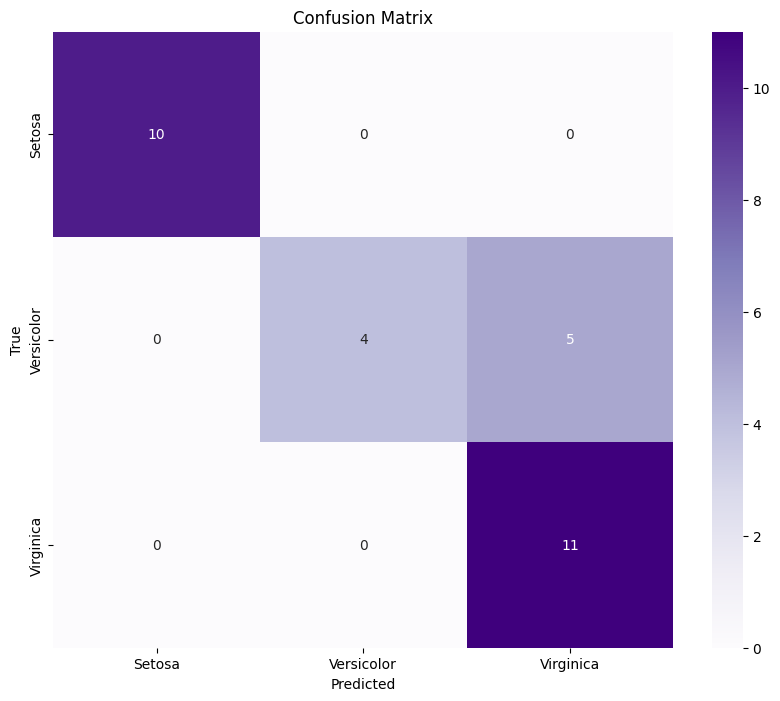

In [ ]:
ConfusionMatrix2 = confusion_matrix(y_test, pred_2_class)
plt.figure(figsize=(10,8))
sns.heatmap(ConfusionMatrix2, annot=True, fmt='d', cmap='Purples', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix and test sample showed that it can easily classify Setosa, unlike Versicolor and Virginica. Earlier in the EDA plots, there was overlap between Versicolor and Virginica, and the model appeared to struggle with classification of them.

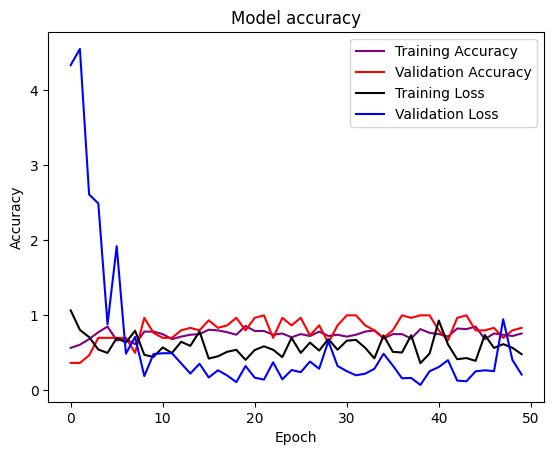

In [ ]:
plt.plot(hist2.history['accuracy'], color='purple', label="Training Accuracy")
plt.plot(hist2.history['val_accuracy'], color ='Red', label = 'Validation Accuracy')
plt.plot(hist2.history['loss'], color = 'black', label = 'Training Loss')
plt.plot(hist2.history['val_loss'], color = 'blue', label = 'Validation Loss')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

The overall plot shows there isn't notiable upward ot downward trend staying flat which suggest a underfitting model, the validation loss drops to lower values but in the end the value seems to be higher than the other lines.

---



# **Conclusion ✨**

The first model is better consedring the archeture is simple, small memory space and short training time that, as well as having only the features that show high relationship with each other. The second model was more complex by having more hidden layers, adapting optimizing methods such as `BatchNormalizing` and `Dropout`, with all of that the accuracy was not bad but not good compared to the first model.  

# **My final thoughts 💭**

---

I started working on this project in the middle of the break, after finishing my EDA cource, I took the cource because I wanted more knowledge about data relationship, the represenation of plots and the math behind them. I started slow with the analysis, I took my time searching ways to understand the dataset more but not making the entire notebook filled with plots however I think I did that 💀. I enjoyed the assignment, I found myself working on it everyday, and adding more stuff to it. My thought process at first was using features that were efficent for the model and compare that model with another model that had all the features, then I decided to change that idea and change the model archeture and make a simple model and a complex model because why not ? In the end i'm satisfied witht the entire notebook, I only hope that my hard work is shown.

